# Chapter 1
## Exercise 1 - Introduction to PyTorch

### Task 
Familiarize yourself with the PyTorch framework by executing and modifying the different commands.

### Installtion 
Follow the instructions in the "Exercises" folder README to install jupyter lab and all dependencies for the exercises.

### Learning goals
Introduce PyTorch framework
Familiarize yourself with its basic syntax and some commands we will see frequently
Experiment with syntax

________________________
Nesse exemplo utilizaremos 3 bibliotecas do python, então o primeiro bloco de código irá realizar as importações para serem usadas nesse exercício.

In [61]:
import torch
import numpy as np
import matplotlib.pyplot as plt

Iremos criar diferentes tipos de tensores:  
**matrix_2x3** -> valores definidos  
**tensor_3x3x3** -> preenchido com zero  
**vector_10** -> esse terá valores espaçados entre 0 e 1  
**matrix_1x3** -> com valores 1  

In [62]:
matrix_2x3 = torch.tensor([[0., 2., 4.], [3., 5., 7.]])
tensor_3x3x3 = torch.zeros(3, 3, 3)
vector_10 = torch.linspace(0, 1, 10)
matrix_1x3 = torch.ones(1, 3)

**matrix_2x3.size()**: retorna o tamanho (shape) do tensor matrix_2x3, que é (2, 3).  
**matrix_2x3[0, 0]**: acessa o primeiro elemento (linha 0, coluna 0).  
**matrix_2x3[:, 0]**: retorna todos os valores da primeira coluna.  
**matrix_2x3[-1, -1]**: acessa o último elemento da última linha.  
**tensor_3x3x3[0, :, :]**: seleciona a primeira "fatia" do tensor tridimensional tensor_3x3x3.  
**matrix_2x3[0, 1:3]**: retorna os elementos das colunas 1 e 2 da primeira linha.  

In [63]:
matrix_2x3.size()
matrix_2x3[0, 0]
matrix_2x3[:, 0]
matrix_2x3[-1, -1]
tensor_3x3x3[0, :, :]
matrix_2x3[0, 1:3]

tensor([2., 4.])

# Tensor Operations
## Functional approach:

### Note that matrix_2x3, tensor_3x3x3, vector_10, and matrix_1x3 remain unchanged

**torch.cat**: concatena dois tensores na dimensão especificada (no caso, na linha).  
**torch.transpose**: troca as dimensões 0 e 1, transformando linhas em colunas.  
**torch.permute**: reordena as dimensões do tensor (ideal para tensores 3D ou maiores).  
**torch.reshape**: altera a forma do tensor sem alterar os dados.  
**torch.unsqueeze**: adiciona uma nova dimensão (útil para broadcast).  
**torch.squeeze**: remove dimensões de tamanho 1.  
**torch.flatten**: transforma o tensor em um vetor 1D.  
**torch.ones_like**: cria um novo tensor com o mesmo shape de outro, mas com todos os valores 1.  
**torch.cos aplica**: a função cosseno elemento a elemento.  

In [64]:
# tuple with name (str) and result operation (tensor)
operations = [
    ("cat", torch.cat((matrix_2x3, matrix_1x3))),
    ("transpose", torch.transpose(matrix_2x3, 0, 1)),
    ("permute", torch.permute(tensor_3x3x3, (2, 1, 0))),
    ("reshape", torch.reshape(matrix_2x3, (1, 6))),
    ("unsqueeze", torch.unsqueeze(matrix_2x3, 0)),
    ("squeeze", torch.squeeze(matrix_1x3, 0)),
    ("flatten", torch.flatten(tensor_3x3x3)),
    ("ones_like", torch.ones_like(vector_10)),
    ("cos", torch.cos(matrix_2x3)),
]

# tuple unpacking method
for name, result in operations:
    print(f"{name}:\n{result}\n")

cat:
tensor([[0., 2., 4.],
        [3., 5., 7.],
        [1., 1., 1.]])

transpose:
tensor([[0., 3.],
        [2., 5.],
        [4., 7.]])

permute:
tensor([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]])

reshape:
tensor([[0., 2., 4., 3., 5., 7.]])

unsqueeze:
tensor([[[0., 2., 4.],
         [3., 5., 7.]]])

squeeze:
tensor([1., 1., 1.])

flatten:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.])

ones_like:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

cos:
tensor([[ 1.0000, -0.4161, -0.6536],
        [-0.9900,  0.2837,  0.7539]])



# Conversion to and from NumPy

**torch.from_numpy**: converte em array Numpy para tensor.  
**.numpy()**: converte um tensor em array do numpy  

a comparação do **numpyArray** e do **ttensorFromNumpy** (torch tensor = ttensor) retorna True porque os dados são iguais. 
Todas as conversões são direto no espaço de memória que está alocado **numpyArray**, logo **tensorFromNumpy** aponta também para esse local de memória e quando se faz **numpyFromTtensor**, ele estará modificando de novo o mesmo valor, então as três variáveis apontam para o mesmo espaço de memória, o que confirma ser True a comparação deles


In [65]:
numpyArray = np.array([2., 3,])
ttensorFromNumpy = torch.from_numpy(numpyArray)
numpyFromTtensor = ttensorFromNumpy.numpy()

numpyArray == numpyFromTtensor


array([ True,  True])

# Grid Creation

Nessa parte, iremos criar uma malha 2D com torch.  

**torch.meshgrid**: cria coordenadas em grades regulares.  
**indexing='ij'**: garante que as dimensões estarão em ordens corretas.

In [66]:
x = torch.linspace(0, 1, 10)
y = torch.linspace(0, 2, 5)
x, y =torch.meshgrid(x, y, indexing='ij')


# Gradient Computation
## Theory is explained later in Chapter 3  


$$
\boldsymbol{J}^\intercal \boldsymbol{v} =
\begin{pmatrix}
\frac{\partial z(y_1)}{\partial y_1} & \dots & \frac{\partial z(y_1)}{\partial y_{x}} \\
\vdots & \ddots & \vdots \\
\frac{\partial z(y_{x})}{\partial y_1} & \dots & \frac{\partial z(y_{x})}{\partial y_{x}}
\end{pmatrix}
\begin{pmatrix}
1 \\ \vdots \\ 1
\end{pmatrix}
=
\begin{pmatrix}
\frac{\partial z(y_1)}{\partial y_1} & \dots & 0 \\
\vdots & \ddots & \vdots \\
0 & \dots & \frac{\partial z(y_{x})}{\partial y_{x}}
\end{pmatrix}
\begin{pmatrix}
1 \\ \vdots \\ 1
\end{pmatrix}
=
\begin{pmatrix}
\frac{\partial z(y_1)}{\partial y_1} \\ \vdots \\ \frac{\partial z(y_{x})}{\partial y_{10}}
\end{pmatrix}
$$


**requires_grad=True**: ativa o rastreamento de operações para permitir o cálculo automático de derivadas.  
**.data**: acessa os dados reais do tensor.  
**.grad**: armazena o gradiente após a chamada de .backward().  
**.grad_fn**: aponta para a função que criou o tensor.  
**.is_leaf**: indica se o tensor é uma folha no grafo computacional (não derivado de outras operações).  

In [67]:
x.requires_grad = True  # after construction - allows backpropogation
y = torch.tensor([0.], requires_grad=True)  # during construction

## Member Variables
x.data
x.requires_grad
x.grad
x.grad_fn
x.is_leaf  # (see Chapter 2)

True

# Example gradients for simple functions

Nesse exemplo, criamos uma função e usamos autograd para calcular derivadas:

**y = 2x e z = y²**: define nossa função.  
**retain_grad()**: é necessário para acessar o gradiente de y, pois PyTorch normalmente descarta gradientes intermediários.  
**.backward()**: propaga os gradientes através do grafo computacional.  
**dzdx e dzdy**: armazenam as derivadas de z em relação a x e y, respectivamente.  
Imprimimos os resultados armazenados no.grad do tensor x

In [68]:
x = torch.linspace(0., 1., 20, requires_grad=True)
y = 2 * x
z = y ** 2

y.retain_grad()  # otherwise gradient with respect to y will be deleted

z.backward(torch.ones_like(z))  # differentiate z with respect to all variables used to create it

dzdx = x.grad  # gradient of z with respect to x: 8 * x
dzdy = y.grad  # gradient of z with respect to y: 2 * y = 4 * x

print(x.grad)

tensor([0.0000, 0.4211, 0.8421, 1.2632, 1.6842, 2.1053, 2.5263, 2.9474, 3.3684,
        3.7895, 4.2105, 4.6316, 5.0526, 5.4737, 5.8947, 6.3158, 6.7368, 7.1579,
        7.5789, 8.0000])


Usamos o Matplotlib para visualizar:

A **função z = (2x)²** que criamos.  
O gradiente **dz/dx = 4x**.  
O gradiente **dz/dy = 2y**.  

A função **detach()** é usada para extrair os dados do tensor sem manter o grafo computacional.

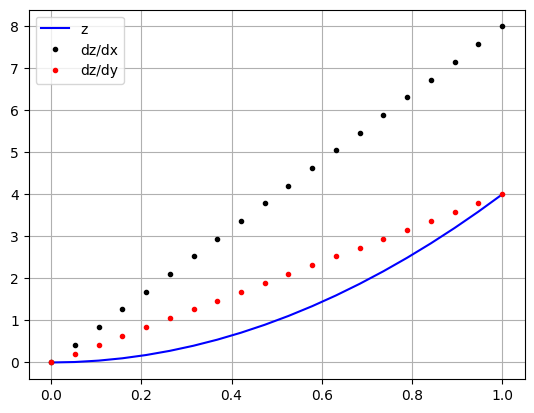

In [69]:
# Plot the function and gradients with respect to variables used in its graph
# .detach() is used when the computation graph is no longer needed
plt.plot(x.detach(), z.detach(), label='z', color = 'blue')
plt.plot(x.detach(), dzdx, '.', label='dz/dx', color = 'black')
plt.plot(x.detach(), dzdy, '.', label='dz/dy', color = 'red')

plt.legend()
plt.grid(True)
plt.show()

# Neural Networks

Neste trecho instanciamos um modelo de rede neural com uma camada linear:

A camada recebe vetores de entrada com 2 valores e retorna saídas com 3 valores.  
**model(x)** realiza a multiplicação peso * entrada + bias.  
Podemos acessar os pesos e bias diretamente com **.weight.data** e **.bias.data**.

In [70]:
model = torch.nn.Linear(2, 3)  # input size: 2 and output size: 3
x = torch.tensor([[1., 2.]])  # input
y = model(x)  # output

# access weight parameters
print("Matrix model weight \n", model.weight.data)  # returns a tensor of shape (3, 2)
print("Matrix model bias \n", model.bias.data)  # returns a tensor of shape (3)

Matrix model weight 
 tensor([[ 0.6320,  0.1940],
        [-0.4246, -0.1988],
        [ 0.0705,  0.2972]])
Matrix model bias 
 tensor([-0.1680, -0.0538,  0.4430])


# GPU Acceleration

Por fim, mostramos como utilizar a GPU se disponível:

**torch.device** escolhe entre CPU e CUDA automaticamente.  
Tensores e modelos podem ser criados diretamente na GPU ou transferidos com **.to(device)**.  
O método **.cpu()** traz os dados de volta para a CPU.

In [81]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

a = torch.ones(4, device=device)  # cuda
b = torch.ones(4)  # cpu

# transfer to CUDA
b = b.to(device)
model = model.to(device)

# transfer back to CPU
a.cpu()

cuda


tensor([1., 1., 1., 1.])